In [1]:

from torchvision.transforms.functional import to_pil_image

from torchcam.cams import ScoreCAM
from torchcam.utils import overlay_mask

import cv2
from tqdm import tqdm
import time

import numpy as np
from PIL import Image
from torchvision import models, transforms

import torch

from torchvision.transforms import Compose
import os
import torch.nn as nn

from imutils import paths

import matplotlib.pyplot as plt

from pfe.preprocessing.bonsup.resnetbs import resnet_bs

from pfe.preprocessing.segmentation.VAE import uVAE
from pfe.utils.utils import saveMask, loadDCM

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
resnet18masked = models.resnet18(pretrained=True)

resnet18masked.fc = nn.Sequential(
                    nn.Linear(512, 256),
                    nn.ReLU(),
                    nn.Linear(256, 4))
resnet18masked.to(device)
resnet18masked.load_state_dict(torch.load('pretrained_models/xresnet18masked.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
resnetbs = resnet_bs(num_filters=64, num_res_blocks=16, res_block_scaling=0.1)


In [5]:

VAE = uVAE(nhid= 16, nlatent=8)
VAE.load_state_dict(torch.load('pretrained_models/VAE.pt', map_location=torch.device("cpu")))
VAE.to(device)
VAE.eval()

resnetbs.load_weights('pretrained_models/resnet-bs.h5')

In [6]:
#path = "/content/gdrive/MyDrive/Our PFE/PFE/Data/OurData/Mendeley/Data/PNEUMONIA"
#img_paths = list(paths.list_images(path))
#len(img_paths)

In [7]:
def plot_hm(image):
  y_test_pred = resnet18masked(image.unsqueeze(0).to(device))
  _, y_pred_tags = torch.max(y_test_pred, dim = 1)
  activation_map = cam_extractor(y_test_pred.squeeze(0).argmax().item(), y_test_pred)
  result = overlay_mask(to_pil_image(image), to_pil_image(activation_map, mode='F'), alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [8]:
image_list = ['/Users/benx13/PycharmProjects/pythonProject/pfe/images/chexnet.png']

  0%|          | 0/1 [00:00<?, ?it/s]

0 chexnet.png
(256, 256)
-----og-pred----


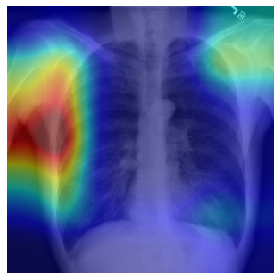

-----masked-pred----


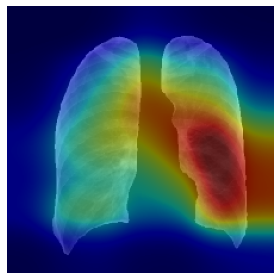

-----bs-pred----


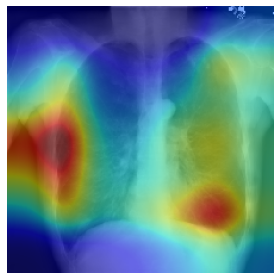

-----bs-masked-pred----


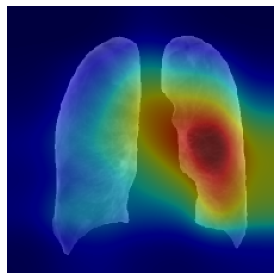

  0%|          | 0/1 [04:19<?, ?it/s]


In [28]:
i = 0
cam_extractor = ScoreCAM(resnet18masked)
for imgp in tqdm(image_list):
  print(str(i)+" "+imgp.split(os.path.sep)[-1])
  i+=1

  x = cv2.imread(imgp, cv2.IMREAD_GRAYSCALE)

  break

In [ ]:
del masked

In [29]:
import streamlit as lt

In [ ]:
like something ready we just change the script?
do have any demos we can use?
